<a href="https://colab.research.google.com/github/ClaretWheel1481/Artificial-Intelligence/blob/main/04_%E6%89%8B%E5%86%99%E4%BD%93%E6%95%B0%E5%AD%97%E9%A2%84%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [43]:
# 数据预处理
# Compose: 将各种预处理操作组成到一起
# ToTensor(): 将图片数据转成Pytorch中的处理对象Tensor，并且做归一化（数据在0~1）
# Normalize: 做标准化，进行了减均值，除标准差
data_tf = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [44]:
# 加载数据
train_dataset = datasets.MNIST(
    root='./',
    train=True,
    transform=data_tf,
    download=True
)

test_dataset = datasets.MNIST(
    root='./',
    train=False,
    transform=data_tf,
    download=False
)

In [45]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )

In [46]:
# 数据分批次
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

5


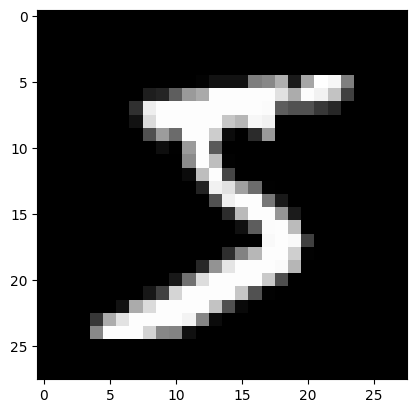

In [47]:
# 数据可视化
data, label = train_dataset[0]
print(label)
plt.imshow(data.numpy().squeeze(), cmap='gray')

In [48]:
# 搭建全连接神经网络
class BaseNet(torch.nn.Module):
  def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
    super().__init__()
    self.layer1 = torch.nn.Sequential(torch.nn.Linear(in_dim, n_hidden_1), torch.nn.ReLU())
    self.layer2 = torch.nn.Sequential(torch.nn.Linear(n_hidden_1, n_hidden_2), torch.nn.ReLU())
    self.layer3 = torch.nn.Sequential(torch.nn.Linear(n_hidden_2, out_dim))

  def forward(self,x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    return x

In [49]:
model = BaseNet(in_dim=28*28, n_hidden_1=300, n_hidden_2=100, out_dim=10)

In [50]:
model

BaseNet(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [51]:
# 定义损失函数和优化器
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

## **模型训练**

In [53]:
epochs = 10

for epoch in range(epochs):

  loss_list = []

  # 得到每个批次的数据
  for data in train_loader:
    # 得到每个批次的特征值和目标值
    img,label = data

    # 判断是否用GPU训练
    if torch.cuda.is_available():
      img = img.cuda()
      label = label.cuda()
      model.cuda()

    # 将输入数据展平
    img = img.view(img.size(0), -1)

    # 传入模型得到预测结果
    out = model(img)

    # 计算损失值
    loss = criterion(out,label.long())
    loss_list.append(loss.cpu().item())

    # 梯度清零
    optimizer.zero_grad()

    # 误差反向传播
    loss.backward()

    # 计算梯度更新参数
    optimizer.step()

  # 输出每个Epoch
  print(f'Epoch: {epoch+1}\tLoss: {np.mean(loss_list):.4f}')

Epoch: 1	Loss: 0.3156
Epoch: 2	Loss: 0.2569
Epoch: 3	Loss: 0.2124
Epoch: 4	Loss: 0.1782
Epoch: 5	Loss: 0.1525
Epoch: 6	Loss: 0.1328
Epoch: 7	Loss: 0.1168
Epoch: 8	Loss: 0.1054
Epoch: 9	Loss: 0.0940
Epoch: 10	Loss: 0.0856
